# ACME: Numerical Differentiation 

Problem 1

Write a function that defines f (x) = (sin(x) + 1)sin(cos(x)) and takes its symbolic derivative with respect to x using SymPy. Lambdify the resulting function so that it can accept NumPy arrays and return the resulting function handle.
To check your function, plot f and its derivative f′ over the domain [−π,π]. It may be helpful to move the bottom spine to 0 so you can see where the derivative crosses the x-axis.

In [6]:
from matplotlib import pyplot as plt
import sympy as sy
import numpy as np

x = sy.symbols('x')

In [7]:
#Original function
f_x = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
f_x1 = sy.lambdify(x,f_x)

#Derivative
f_prime = sy.diff(f_x)
f_prime1 = sy.lambdify(x, f_prime)

In [8]:
points = np.arange(-3.14,3.14)

In [9]:
f_prime1(points)
f_x1(points)

array([1.00134214, 2.5807851 , 0.37890804, 0.88190968, 1.40842419,
       0.82769883, 0.81794686])

(0, 3)

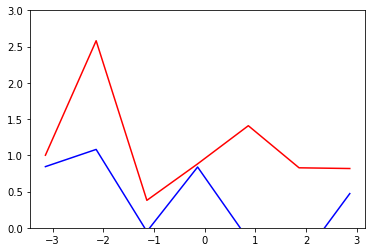

In [10]:
plt.plot(points, f_x1(points), 'r', label = 'Orig')
plt.plot(points, f_prime1(points), 'b', label = 'Deriv')
plt.ylim(0, 3)

Problem 2

Write a function for each of the finite difference quotients listed in Table 8.1. Each function should accept a function handle f, an array of points x, and a float h; each should return an array of the difference quotients evaluated at each point in x.
To test your functions, approximate the derivative of f (x) = (sin(x) + 1)sin(cos(x)) at each point of a domain over [−π, π]. Plot the results and compare them to the results of Problem 1.



In [11]:
f_forward1 = lambda f,x,h: (f(x+h)-f(x))/h
f_forward2 = lambda f,x,h: (-3*f(x)+4*f(x+h)-f(x+h))/ (2*h)
f_back1 = lambda f,x,h: (f(x)-f(x-h))/h
f_back2 = lambda f,x,h: (3*f(x)- 4*f(x-h)+f(x-2*h))/(2*h)
f_center1 = lambda f,x,h: (f(x+h)-f(x-h))/(2*h)
f_center2 = lambda f,x,h: (f(x-2*h)- 8*f(x-h)+ 8*f(x+h)-f(x+2*h))/(12*h)

In [15]:
h=.01
f_forward1(f_prime1,points,h)
f_forward2(f_prime1,points,h)
f_back1(f_prime1,points,h)
f_back2(f_prime1,points,h)
f_center1(f_prime1,points,h)
f_center2(f_prime1,points,h)

array([ 1.55263771, -7.84232719,  1.85126545,  0.16967348, -1.78651388,
        0.91247538,  1.11582144])

(-10, 3)

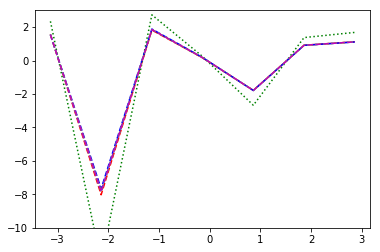

In [43]:
plt.plot(points, f_forward1(f_prime1,points,h), 'r--')
plt.plot(points, f_forward2(f_prime1,points,h), 'g:')
plt.plot(points, f_back1(f_prime1,points,h), 'b----')
plt.plot(points, f_back2(f_prime1,points,h), 'y----')
plt.plot(points, f_center1(f_prime1,points,h), 'c:')
plt.plot(points, f_center2(f_prime1,points,h), 'm--')

plt.ylim(-10, 3)